<a href="https://colab.research.google.com/github/YutaMiyakawa/Yolo/blob/main/(edition)BlueBerry_tree_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Drive をマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ビルド

In [ ]:
%cd /content/drive/My\ Drive/BlueBerry_Tree_YOLO(edition)
!make

/content/drive/My Drive/BlueBerry_Tree_YOLO(edition)
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF obj/image_opencv.o obj/http_stream.o obj/gemm.o obj/utils.o obj/dark_cuda.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o obj/network.o obj/connected_layer.o obj/cost_layer.o obj/parser.o obj/option_list.o obj/darknet.o obj/detection_layer.o obj/captcha.o obj/route_layer.o obj/writing.o obj/box.o obj/nightmare.o obj/normalization_layer.o obj/avgpool_layer.o obj/coco.o obj/dice.o obj/yolo.o obj/detector.o obj/layer.o obj/compare.o obj/cla

作業フォルダの指定

In [ ]:
dir='Tree_864_576'

train-test の切り分け

In [ ]:
import glob, os
from itertools import chain
os.chdir('/content/drive/My Drive/BlueBerry_Tree_YOLO(edition)/workspace/')

# ここを変えよう
percentage_test = 20

file_train = open(dir + '/train.txt', 'w')
file_test = open(dir + '/test.txt', 'w')

count = 0
index_test = round(100 / percentage_test)
file_list = []
for root, dirs, files in os.walk(dir + '/dataset/'):
  for ext in ['png', 'PNG', 'jpg', 'JPG', 'jpeg', 'JPEG']:
    file_list.extend([os.path.join(root, file) for file in files if ext in file])
for pathAndFilename in file_list:
  count = count + 1
  title, ext = os.path.splitext(os.path.basename(pathAndFilename))
  if count % index_test == 0:
    file_test.write('workspace/' + dir + '/dataset/' + title + ext + '\n')
  else:
    file_train.write('workspace/' + dir + '/dataset/' + title + ext + '\n')
print('Completed dividing {} image files into "train.txt" and "test.txt".'.format(count))

Completed dividing 404 image files into "train.txt" and "test.txt".


学習開始(tiny)

In [ ]:
%cd /content/drive/My\ Drive/BlueBerry_Tree_YOLO(edition)
!mkdir workspace/{dir}/backup
!./darknet detector\
  train\
  workspace/{dir}/_.data\
  workspace/{dir}/_.cfg\
  workspace/yolov4-tiny.conv.29\
  -map\
  -dont_show

ストリーミング出力は最後の 5000 行に切り捨てられました。
 total_bbox = 258296, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.844713), count: 18, class_loss = 0.392499, iou_loss = 0.654343, total_loss = 1.046842 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.000000), count: 1, class_loss = 0.000588, iou_loss = 0.000000, total_loss = 0.000588 
 total_bbox = 258314, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.860337), count: 16, class_loss = 0.678655, iou_loss = 0.698997, total_loss = 1.377653 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.407268), count: 1, class_loss = 0.125005, iou_loss = 1.733187, total_loss = 1.858192 
 total_bbox = 258331, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.827820), count: 19, class_loss = 0.587625, iou_loss = 0.500

学習開始(v4)

In [ ]:
%cd /content/drive/My\ Drive/BlueBerry_Tree_YOLO(edition)
!mkdir workspace/{dir}/backup
!./darknet detector\
  train\
  workspace/{dir}/_.data\
  workspace/{dir}/yolov4-custom.cfg\
  workspace/yolov4.conv.137\
  -map\
  -dont_show

ストリーミング出力は最後の 5000 行に切り捨てられました。
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.000000), count: 1, class_loss = 0.000003, iou_loss = 0.000000, total_loss = 0.000003 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.963671), count: 9, class_loss = 0.000086, iou_loss = 2.813754, total_loss = 2.813841 
 total_bbox = 1536615, rewritten_bbox = 0.018677 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000002, iou_loss = 0.000000, total_loss = 0.000002 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.915523), count: 1, class_loss = 0.036284, iou_loss = 2.658894, total_loss = 2.695178 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.957133), count: 9, class_loss = 0.004816, iou_loss = 2.938143, total_loss = 2.942959 
 total_bbox = 1536625, rewritten_bbox = 0.018677 % 
v3 (iou loss, Norma

学習再開

In [ ]:
%cd /content/drive/My\ Drive/BlueBerry_Tree_YOLO(edition)
!./darknet detector\
  train\
  workspace/{dir}/_.data\
  workspace/{dir}/_.cfg\
  workspace/{dir}/backup/__last.weights\
  -map\
  -dont_show

推論

In [ ]:
import random
%cd /content/drive/My\ Drive/BlueBerry_Tree_YOLO(edition)
!./darknet detector\
  test\
  workspace/{dir}/_.data\
  workspace/{dir}/yolov4-custom.cfg\
  workspace/{dir}/backup/yolov4-custom_best.weights\
  workspace/{dir}/example/IMG_1029.JPG
  #random.sample(glob.glob(workspace/{dir}/example+'/*'), 1):

/content/drive/My Drive/BlueBerry_Tree_YOLO(edition)
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    864 x 476 x   3 ->  864 x 476 x  32 0.711 BF
   1 conv     64       3 x 3/ 2    864 x 476 x  32 ->  432 x 238 x  64 3.790 BF
   2 conv     64       1 x 1/ 1    432 x 238 x  64 ->  432 x 238 x  64 0.842 BF
   3 route  1 		                           ->  432 x 238 x  64 
   4 conv     64       1 x 1/ 1    432 x 238 x  64 ->  432 x 238 x  64 0.842 BF
   5 conv     32       1 x 1/ 1    432 x 238 x  64 ->  432 x 238 x  32 0.421 BF
   6 conv     64       3 x 3/ 1    432 x 238 x  32 ->  432 x 238 x  64 3.790 BF
   7 Shortcut Layer: 

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    864 x 576 x   3 ->  432 x 288 x  32 0.215 BF
   1 conv     64       3 x 3/ 2    432 x 288 x  32 ->  216 x 144 x  64 1.147 BF
   2 conv     64       3 x 3/ 1    216 x 144 x  64 ->  216 x 144 x  64 2.293 BF
   3 route  2 		                       1/2 ->  216 x 144 x  32 
   4 conv     32       3 x 3/ 1    216 x 144 x  32 ->  216 x 144 x  32 0.573 BF
   5 conv     32       3 x 3/ 1    216 x 144 x  32 ->  216 x 144 x  32 0.573 BF
   6 route  5 4 	                           ->  216 x 144 x  64 
   7 conv     64       1 x 1/ 1    216 x 144 x  64 ->  216 x 144 x  64 0.255 BF
   8 route

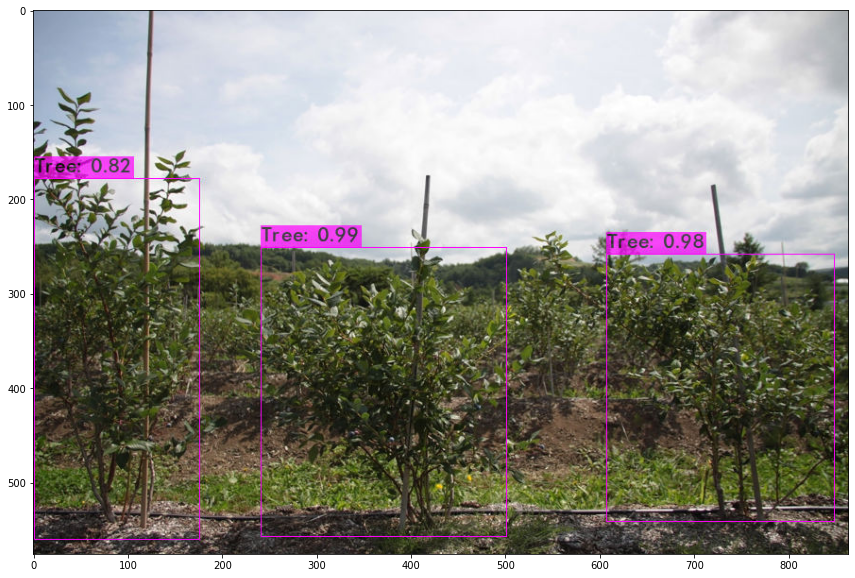

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

!./darknet detector\
  test\
  workspace/{dir}/tiny.data\
  workspace/{dir}/tiny.cfg\
  workspace/{dir}/backup-tiny/__best.weights\
  -ext_output workspace/{dir}/testimage/IMG_1069.jpg

img = cv2.imread("predictions.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,10))
plt.imshow(img)

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    864 x 476 x   3 ->  864 x 476 x  32 0.711 BF
   1 conv     64       3 x 3/ 2    864 x 476 x  32 ->  432 x 238 x  64 3.790 BF
   2 conv     64       1 x 1/ 1    432 x 238 x  64 ->  432 x 238 x  64 0.842 BF
   3 route  1 		                           ->  432 x 238 x  64 
   4 conv     64       1 x 1/ 1    432 x 238 x  64 ->  432 x 238 x  64 0.842 BF
   5 conv     32       1 x 1/ 1    432 x 238 x  64 ->  432 x 238 x  32 0.421 BF
   6 conv     64       3 x 3/ 1    432 x 238 x  32 ->  432 x 238 x  64 3.790 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 432 x 238 x  64 0.007 BF

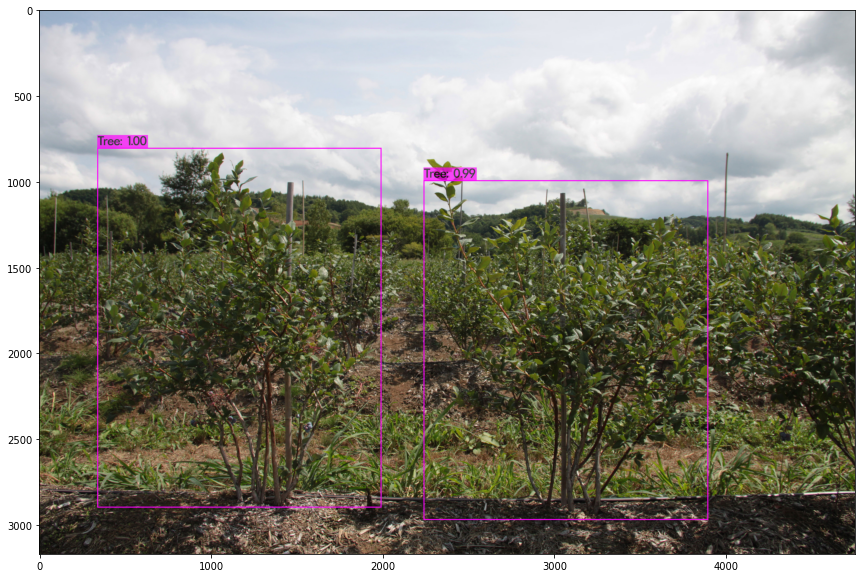

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

!./darknet detector\
  test\
  workspace/{dir}/yolov4-custom.data\
  workspace/{dir}/yolov4-custom.cfg\
  workspace/{dir}/backup/yolov4-custom_best.weights\
  -ext_output workspace/{dir}/example/IMG_1150.JPG

img = cv2.imread("predictions.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,10))
plt.imshow(img)